<a href="https://colab.research.google.com/github/E23A48/TF_MachineLearning/blob/main/TF_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TF**
**MACHINE LEARNING**
2020-2

Integrantes:
*   Piero Herrera
*   Camilo Silva
*   Diego Urrutia

#**Introducción :**

#**Convolutional Neural Network**

In [52]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [64]:
dirname = os.path.join(os.getcwd(), 'fruits')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0


for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
           
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)


Directorios leidos: 6
Imagenes en cada directorio [121, 105, 155, 85, 155, 129]


In [80]:
fruits=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    fruits.append(name[len(name)-1])
    indice=indice+1

0 Apple 2
1 Apple
2 Banana
3 Avocado
4 Fresa
5 Mango


In [81]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [82]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (600, 100, 100, 3) (600,)
Testing data shape :  (150, 100, 100, 3) (150,)


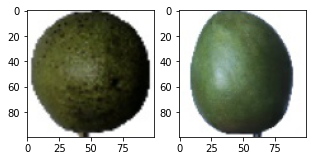

In [91]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')


In [85]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [92]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0.]


In [93]:
epochs = 10
batch_size = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100,100,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5)) 
model.add(Dense(nClasses, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 80000)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2560032   
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 32)              

In [94]:
model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))



Epoch 1/10
24/24 [==============================] - 4s 173ms/step - loss: 2.4735 - accuracy: 0.5646 - val_loss: 0.4281 - val_accuracy: 0.7750
Epoch 2/10
24/24 [==============================] - 4s 169ms/step - loss: 0.3648 - accuracy: 0.8938 - val_loss: 0.0620 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 4s 172ms/step - loss: 0.1413 - accuracy: 0.9688 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 4s 171ms/step - loss: 0.1444 - accuracy: 0.9833 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 4s 171ms/step - loss: 0.0962 - accuracy: 0.9833 - val_loss: 0.0946 - val_accuracy: 0.9500
Epoch 6/10
24/24 [==============================] - 4s 170ms/step - loss: 0.1074 - accuracy: 0.9833 - val_loss: 6.6028e-04 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 4s 170ms/step - loss: 0.1143 - accuracy: 0.9917 - val_loss: 2.4096e-04 - val_accuracy: 1.000

In [95]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

5/5 [==============================] - 0s 78ms/step - loss: 0.2877 - accuracy: 0.9867
Test loss: 0.28773894906044006
Test accuracy: 0.9866666793823242


In [98]:
predicted_classes2 = model.predict(test_X)

predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

Found 148 correct labels


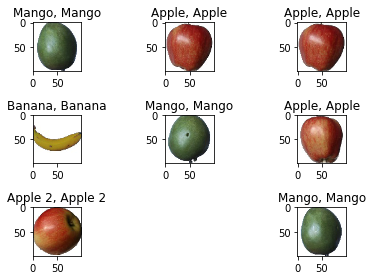

In [105]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(fruits[predicted_classes[correct]],
                                                    fruits[test_Y[correct]]))

    plt.tight_layout()

Found 2 incorrect labels


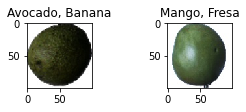

In [108]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(100,100,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [109]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        20
     Class 1       1.00      1.00      1.00        29
     Class 2       1.00      0.97      0.98        29
     Class 3       0.94      1.00      0.97        15
     Class 4       1.00      0.97      0.98        33
     Class 5       0.96      1.00      0.98        24

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

